# Elementary Education Early Intervention


Problem Statement:<br>
Students are taking three district standard thest every year. However, teachers tend to address issues that students may have towards the later part of the year (usually after the second test). Although this is helpful, it would be more useful if teachers could identify students in need of additional intervention at an earlier stage within the school year. My goal will be to use machine learning to help teachers identify which student needs early intervention after the first test (within the first marking period). This would allow teachers the ability to work with the students in problem areas in hopes of producing higher test scores.

# Import Libraries



In [23]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Ingestion


In [22]:
data = pd.read_excel("Data for Summer Project (1).xlsx")
data

,Student Name,Student Id,Gender,ESE Primary Exceptionality,Teacher,Ethnicity,22/23 FAST PM3 Scale Score,22/23 FAST PM3 Achievement Level,23/24 FAST PM1 Scale Score,23/24 FAST PM1 Achievement Level,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Quarter 1 Grade,Quarter 2 Grade,Quarter 3 Grade,Quarter 4 Grade,Final Grade
0,"Addison, Kendrick",20075802,M,Specific Learning Disability,Rogers,African American,NaN,NaN,155.0,1.0,155.0,1.0,172.0,1.0,0.6,0.61,0.6,0.62,61
1,"Allen, Demetri",20105857,M,?,Jenkins,African American,NaN,NaN,194.0,1.0,203.0,2.0,206.0,2.0,78.0,78.00,81.0,70.00,77
2,"Arnold, Jackson",20142757,M,?,Queen,African American,219.0,4.0,213.0,3.0,222.0,4.0,238.0,5.0,91.0,87.00,90.0,90.00,90
3,"Backmon, Blair",20098882,F,?,Queen,African American,190.0,2.0,191.0,1.0,203.0,2.0,215.0,3.0,70.0,78.00,84.0,93.00,81
4,"Bagley, Zamiyah",20169020,F,?,Rogers,African American,181.0,1.0,187.0,1.0,197.0,1.0,216.0,3.0,65.0,70.00,70.0,79.00,71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,"White, Kaden",20078051,M,?,Jenkins,African American,206.0,3.0,199.0,1.0,219.0,3.0,225.0,4.0,88.0,89.00,86.0,87.00,88
120,"Williams, Raquelle",20124967,F,?,Rogers,African American,NaN,NaN,177.0,1.0,195.0,1.0,211.0,3.0,77.0,70.00,72.0,83.00,76
121,"Williams, Skylar",20051569,F,?,Queen,African American,205.0,3.0,191.0,1.0,206.0,2.0,219.0,3.0,80.0,82.00,78.0,78.00,80
122,"Wilson, Kyleigh",20195531,F,?,Jenkins,African American,190.0,2.0,180.0,1.0,210.0,2.0,222.0,4.0,90.0,90.00,92.0,81.00,88


In [24]:
data.describe()

,Student Id,22/23 FAST PM3 Scale Score,22/23 FAST PM3 Achievement Level,23/24 FAST PM1 Scale Score,23/24 FAST PM1 Achievement Level,23/24 FAST PM2 Scale Score,23/24 FAST PM2 Achievement Level,23/24 FAST PM3 Scale Score,23/24 FAST PM3 Achievement Level,Quarter 1 Grade,Quarter 2 Grade,Quarter 3 Grade,Quarter 4 Grade,Final Grade
count,1.240000e+02,108.000000,108.000000,117.000000,117.000000,120.000000,120.000000,123.000000,123.000000,109.000000,113.000000,121.000000,124.000000,124.000000
mean,1.955965e+07,198.916667,2.842593,187.504274,1.307692,203.983333,2.258333,214.528455,2.967480,80.390826,79.067345,79.690909,79.803387,80.040323
std,3.171163e+06,21.490761,1.185284,17.628163,0.622309,18.775535,1.118942,20.594972,1.279952,13.783280,13.839798,13.789730,14.020134,10.976989
min,0.000000e+00,140.000000,1.000000,155.000000,1.000000,155.000000,1.000000,155.000000,1.000000,0.600000,0.610000,0.600000,0.620000,54.000000
25%,2.008003e+07,190.000000,2.000000,178.000000,1.000000,196.000000,1.000000,205.000000,2.000000,74.000000,73.000000,72.000000,71.000000,72.000000
50%,2.010112e+07,202.000000,3.000000,191.000000,1.000000,206.000000,2.000000,217.000000,3.000000,83.000000,81.000000,82.000000,81.000000,81.000000
75%,2.011207e+07,214.250000,4.000000,199.000000,1.000000,216.250000,3.000000,226.500000,4.000000,91.000000,89.000000,89.000000,90.000000,88.000000
max,2.023824e+07,238.000000,5.000000,229.000000,4.000000,255.000000,5.000000,265.000000,5.000000,98.000000,97.000000,100.000000,101.000000,97.000000


# Analysis of the Data

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124 entries, 0 to 123
Data columns (total 19 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Student Name                      124 non-null    object 
 1   Student Id                        124 non-null    int64  
 2   Gender                            124 non-null    object 
 3   ESE Primary Exceptionality        124 non-null    object 
 4   Teacher                           124 non-null    object 
 5   Ethnicity                         124 non-null    object 
 6   22/23 FAST PM3 Scale Score        108 non-null    float64
 7   22/23 FAST PM3 Achievement Level  108 non-null    float64
 8   23/24 FAST PM1 Scale Score        117 non-null    float64
 9   23/24 FAST PM1 Achievement Level  117 non-null    float64
 10  23/24 FAST PM2 Scale Score        120 non-null    float64
 11  23/24 FAST PM2 Achievement Level  120 non-null    float64
 12  23/24 FA

In [26]:
data.columns

Index(['Student Name', 'Student Id', 'Gender', 'ESE Primary Exceptionality',
       'Teacher', 'Ethnicity', '22/23 FAST PM3 Scale Score',
       '22/23 FAST PM3 Achievement Level', '23/24 FAST PM1 Scale Score',
       '23/24 FAST PM1 Achievement Level', '23/24 FAST PM2 Scale Score',
       '23/24 FAST PM2 Achievement Level', '23/24 FAST PM3 Scale Score',
       '23/24 FAST PM3 Achievement Level', 'Quarter 1 Grade',
       'Quarter 2 Grade', 'Quarter 3 Grade', 'Quarter 4 Grade', 'Final Grade'],
      dtype='object')

# Exploratory Data Analysis

## Missing Values

In [27]:
data.isnull().sum()

Student Name                         0
Student Id                           0
Gender                               0
ESE Primary Exceptionality           0
Teacher                              0
Ethnicity                            0
22/23 FAST PM3 Scale Score          16
22/23 FAST PM3 Achievement Level    16
23/24 FAST PM1 Scale Score           7
23/24 FAST PM1 Achievement Level     7
23/24 FAST PM2 Scale Score           4
23/24 FAST PM2 Achievement Level     4
23/24 FAST PM3 Scale Score           1
23/24 FAST PM3 Achievement Level     1
Quarter 1 Grade                     15
Quarter 2 Grade                     11
Quarter 3 Grade                      3
Quarter 4 Grade                      0
Final Grade                          0
dtype: int64

Provide explanation, note the approach on missing  values

## Data Visualization

(array([ 5.,  3.,  1.,  5., 11., 20., 25., 20., 14.,  4.]),
 array([140. , 149.8, 159.6, 169.4, 179.2, 189. , 198.8, 208.6, 218.4,
        228.2, 238. ]),
 <BarContainer object of 10 artists>)

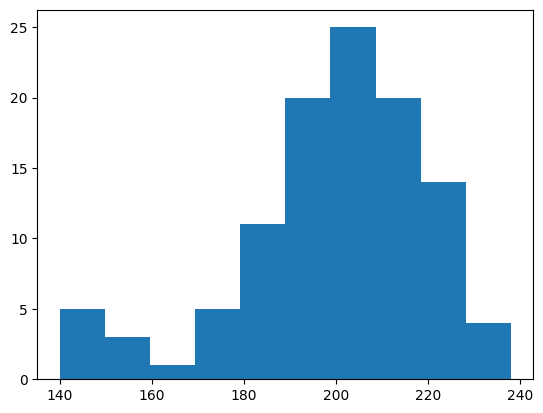

In [36]:
plt.hist("22/23 FAST PM3 Scale Score", data=data)

(array([55.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 69.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

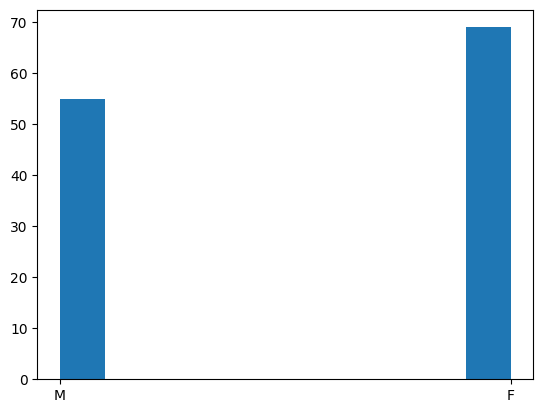

In [31]:
plt.hist("Gender", data=data)

<BarContainer object of 124 artists>

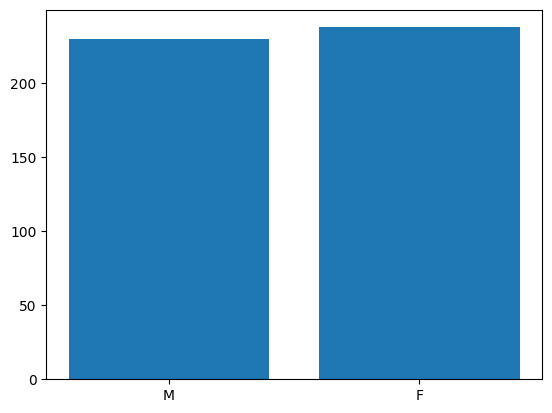

In [34]:
plt.bar("Gender","22/23 FAST PM3 Scale Score", data=data)

<Axes: xlabel='Gender', ylabel='22/23 FAST PM3 Scale Score'>

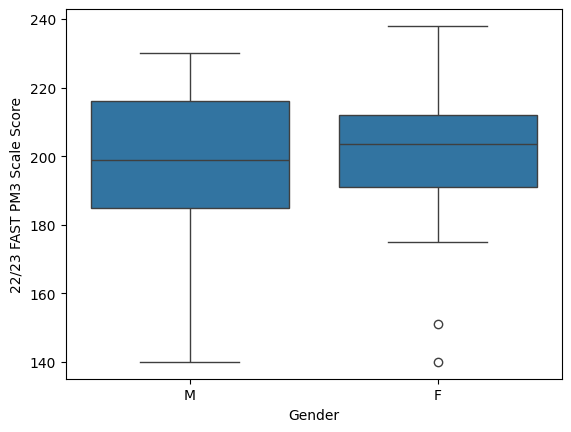

In [43]:
sns.boxplot(x="Gender",y="22/23 FAST PM3 Scale Score", data=data)

## Corelation Analysis


## Data Preprocessing

### Encoding

### Scaling